Author : Nithesh Kumar Manimaran         
Date : 21/09/2022

Importing the libraries

In [2]:
import numpy as np
import pandas as pd


1. Data Setup

In [3]:
#load data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [19]:
#Loading the dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('train.csv')

In [20]:
merged = pd.concat([train, test], axis=0, sort=True)

<AxesSubplot:>

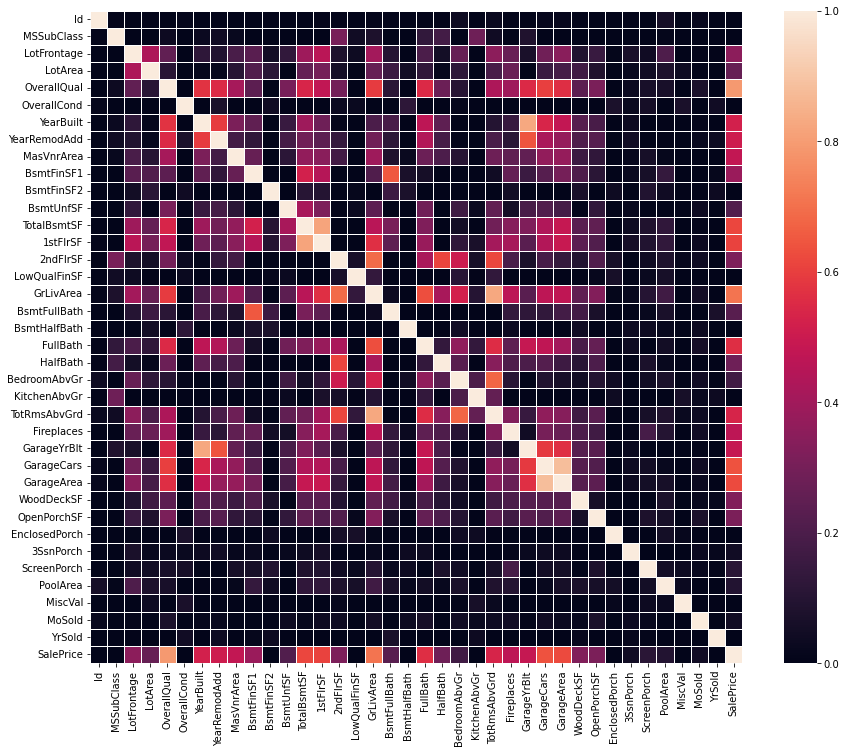

In [23]:
#Coorealation matrix of train
import matplotlib.pyplot as plt
import seaborn as sns
corr = train.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, linewidths=.5, vmin=0, vmax=1, square=True)

In [24]:
#Numerical Values
numerical = train.select_dtypes(include=['int64','float64']).drop(['SalePrice','Id'],axis=1)
numerical.head()
#Categorical Values
categorical = train.select_dtypes(exclude=['int64','float64'])
categorical.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [25]:
#Create a new dataset with two continuous variables and two categorical variables
df = train[['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','FullBath','YearBuilt']]
df.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,FullBath,YearBuilt
0,208500,7,1710,2,548,856,2,2003
1,181500,6,1262,2,460,1262,2,1976
2,223500,7,1786,2,608,920,2,2001
3,140000,7,1717,3,642,756,1,1915
4,250000,8,2198,3,836,1145,2,2000


In [5]:
#Finding the missing values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
SalePrice,49.982871
FireplaceQu,48.646797
LotFrontage,16.649538
GarageCond,5.447071
GarageYrBlt,5.447071
GarageFinish,5.447071


In [ ]:
#Missing values in train
missing_num= train_df[train_df.columns].isna().sum().sort_values(ascending=False)
missing_perc= (train_df[train_df.columns].isna().sum()/len(train_df)*100).sort_values(ascending=False)
missing= pd.concat([missing_num,missing_perc],keys=['Total','Percentage'],axis=1)
missing_train= missing[missing['Percentage']>0]
missing_train

#Missing values in test
missing_num= test_df[test_df.columns].isna().sum().sort_values(ascending=False)
missing_perc= (test_df[test_df.columns].isna().sum()/len(test_df)*100).sort_values(ascending=False)
missing= pd.concat([missing_num,missing_perc],keys=['Total','Percentage'],axis=1)
missing_test= missing[missing['Percentage']>0]
missing_test

In [6]:
#Imputing missing values
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")


In [7]:
#Check remaining missing values if any 

all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio
SalePrice,49.982871


In [12]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   object 
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemo

In [14]:
#Operating NUmnerical features
train_num = all_data.select_dtypes(exclude=['object'])
train_num.sample(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
1639,60,80.0,12388,7,7,1980,1991,229.0,602.0,0.0,...,178,84,0,0,0,0,0,8,2009,NaN
1878,20,70.0,16269,5,5,1978,1978,76.0,625.0,0.0,...,72,0,0,0,0,0,0,7,2009,NaN
9,190,50.0,7420,5,6,1939,1950,0.0,851.0,0.0,...,0,4,0,0,0,0,0,1,2008,118000.0
2735,60,79.0,9462,5,6,1949,1973,0.0,0.0,0.0,...,245,60,0,0,0,0,0,7,2006,NaN
772,80,94.0,7819,6,5,1976,1976,0.0,422.0,127.0,...,144,0,0,0,0,0,0,3,2010,107000.0
1369,20,48.0,10635,8,5,2003,2003,171.0,370.0,972.0,...,0,262,0,0,0,0,0,5,2010,232000.0
2834,20,78.0,9316,7,5,2005,2005,140.0,56.0,0.0,...,100,45,0,0,0,0,0,3,2006,NaN
2633,20,90.0,18261,9,5,2005,2005,420.0,1416.0,0.0,...,351,102,0,0,123,0,0,9,2006,NaN
1379,80,73.0,9735,5,5,2006,2007,0.0,0.0,0.0,...,100,0,0,0,0,0,0,5,2008,167500.0
1540,70,60.0,10560,6,7,1922,1994,0.0,283.0,0.0,...,0,0,0,0,0,0,0,6,2010,NaN


In [15]:
# Let's select features where the correlation with 'SalePrice' is higher than |0.3|
# -1 because the latest row is SalePrice
df_num_corr = train_num.corr()["SalePrice"][:-1]

# Correlated features (r2 > 0.5)
high_features_list = df_num_corr[abs(
    df_num_corr) >= 0.5].sort_values(ascending=False)
print(
    f"{len(high_features_list)} strongly correlated values with SalePrice:\n{high_features_list}\n")

10 strongly correlated values with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64



In [16]:
strong_features = df_num_corr[abs(df_num_corr) >= 0.5].index.tolist()
strong_features.append("SalePrice")
list_of_numerical_features = strong_features[:-1]
list_of_numerical_features

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea']

In [17]:
df_train_num = train_num[list_of_numerical_features]
df_train_num.sample(10)


,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
760,6,1959,1959,864.0,864,864,1,5,1.0,300.0
2884,6,1930,1959,697.0,1104,1801,1,8,2.0,365.0
1289,8,2006,2006,1085.0,1120,1970,2,8,3.0,753.0
883,4,1912,1950,795.0,954,2230,1,10,1.0,440.0
1057,7,1994,1994,973.0,979,1850,2,7,2.0,467.0
324,7,1967,2007,710.0,1898,2978,2,11,2.0,564.0
2707,5,1965,1965,1024.0,1024,1024,1,5,1.0,308.0
1842,5,1967,1967,1052.0,1052,1052,1,6,1.0,668.0
2032,9,1999,2000,1557.0,1557,1557,2,5,2.0,484.0
1981,8,2006,2007,1342.0,1342,1342,2,6,2.0,550.0


In [18]:
df_test_num = all_data[list_of_numerical_features]
df_test_num.sample(10)

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
1311,7,2005,2007,1274.0,1274,1274,2,6,2.0,508.0
425,7,1946,1992,651.0,707,1389,1,6,1.0,240.0
1656,6,1978,1978,804.0,804,1548,2,7,2.0,440.0
2887,6,1926,1950,861.0,861,1285,1,6,2.0,506.0
1966,8,2007,2007,1582.0,1582,1582,2,7,3.0,905.0
228,5,1967,1967,912.0,912,912,1,5,1.0,336.0
1439,7,1979,1979,539.0,1040,1725,2,6,2.0,550.0
1002,8,2006,2006,1574.0,1574,1574,2,7,3.0,824.0
1889,4,1960,1971,1014.0,1149,1149,1,7,1.0,544.0
1921,9,2008,2008,1641.0,1641,1641,2,7,3.0,885.0


In [ ]:
#Scaling

from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [ ]:
#Label Encoding for Categorical features 

from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

In [26]:
df_merged_cat = df_merged.select_dtypes(include = ['object']).astype('category')
print(df_merged_cat.info())

NameError: name 'df_merged' is not defined